In [4]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['churn_prediction.csv']))
df = df.drop(columns = ['customerID'])
df.head()

NameError: ignored

##Preprocessing


In [ ]:
#Converting total charges to float
#df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#df = df.dropna()
df.isnull().sum() #Count Rows containing NaN

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Encoding categorical variables

multi_cols = [df.gender,df.Contract,df.PaymentMethod,df.InternetService,df.MultipleLines,df.OnlineBackup,
              df.OnlineSecurity,df.DeviceProtection,df.TechSupport,df.StreamingTV,df.StreamingMovies]
multi_colnames = ["gender","Contract","PaymentMethod","InternetService","MultipleLines","OnlineBackup",
                  "OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

for i in range(len(multi_cols)):
  df[multi_colnames[i]] = pd.factorize(multi_cols[i])[0]

#Converting yes/no to boolean
yes_no_cols = ["PaperlessBilling","Partner","Dependents","PhoneService","Churn"]
df[yes_no_cols] = df[yes_no_cols] == 'Yes'


In [ ]:
df.dtypes
df.isnull().sum()
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,True,False,1,False,0,0,0,0,0,0,0,0,0,True,0,29.85,29.85,False
1,1,0,False,False,34,True,1,0,1,1,1,0,0,0,1,False,1,56.95,1889.5,False
2,1,0,False,False,2,True,1,0,1,0,0,0,0,0,0,True,1,53.85,108.15,True
3,1,0,False,False,45,False,0,0,1,1,1,1,0,0,1,False,2,42.30,1840.75,False
4,0,0,False,False,2,True,1,1,0,1,0,0,0,0,0,True,0,70.70,151.65,True
5,0,0,False,False,8,True,2,1,0,1,1,0,1,1,0,True,0,99.65,820.5,True
6,1,0,False,True,22,True,2,1,0,0,0,0,1,0,0,True,3,89.10,1949.4,False
7,0,0,False,False,10,False,0,0,1,1,0,0,0,0,0,False,1,29.75,301.9,False
8,0,0,True,False,28,True,2,1,0,1,1,1,1,1,0,True,0,104.80,3046.05,True
9,1,0,False,True,62,True,1,0,1,0,0,0,0,0,1,False,2,56.15,3487.95,False


In [ ]:
df.head()
df.StreamingTV.unique()

array([0, 2, 1])

In [ ]:
#Removing Columns to avoid multicollinearity tenure*MOnthyly charges = Total Charge + error
#df = df.drop(columns = ['tenure'])

In [ ]:
y_train = df.iloc[0:5600,-1]
X_train = df.iloc[0:5600,0:-2]

#80/20 Split
X_test = df.iloc[5600:-1,0:-2]
y_test = df.iloc[5600:-1,-1]
X_test.head()

print(X_train)



      gender  SeniorCitizen  ...  PaymentMethod  MonthlyCharges
0          0              0  ...              2           29.85
1          1              0  ...              3           56.95
2          1              0  ...              3           53.85
3          1              0  ...              0           42.30
4          0              0  ...              2           70.70
...      ...            ...  ...            ...             ...
5595       0              0  ...              3           19.40
5596       0              0  ...              0           26.50
5597       1              1  ...              0           90.50
5598       0              0  ...              1           19.15
5599       1              0  ...              3           94.85

[5600 rows x 18 columns]


# Visualisation


                    gender  Contract  ...  TotalCharges     Churn
gender            1.000000  0.000126  ...     -0.005291 -0.008612
Contract          0.000126  1.000000  ...      0.106178 -0.396713
PaymentMethod     0.017352 -0.227543  ...     -0.067477  0.107062
InternetService  -0.000863  0.099721  ...     -0.055724 -0.047291
MultipleLines    -0.006739  0.110842  ...      0.114955  0.038037
OnlineBackup     -0.012057  0.280980  ...      0.090756 -0.195525
OnlineSecurity   -0.015017  0.374416  ...      0.042357 -0.289309
DeviceProtection  0.000549  0.350277  ...      0.105905 -0.178134
TechSupport      -0.006825  0.425367  ...      0.057488 -0.282492
StreamingTV      -0.006421  0.227116  ...      0.138173 -0.036581
StreamingMovies  -0.008743  0.231226  ...      0.145366 -0.038492
PaperlessBilling -0.011754 -0.176733  ...      0.100957  0.191825
Partner          -0.001808  0.294806  ...      0.059568 -0.150448
Dependents        0.010517  0.243187  ...     -0.009572 -0.164221
PhoneServi

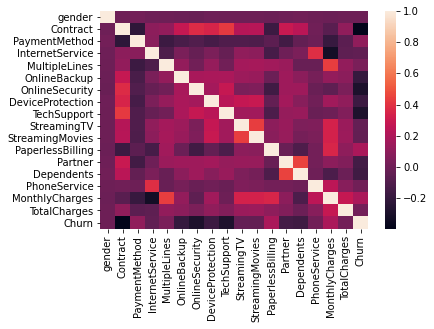

In [ ]:
import seaborn as sns
corr = df[["gender","Contract","PaymentMethod","InternetService",
           "MultipleLines","OnlineBackup","OnlineSecurity","DeviceProtection",
           "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling",
           "Partner","Dependents","PhoneService","MonthlyCharges","TotalCharges","Churn"]].corr()
print(corr)
sns.heatmap(corr)

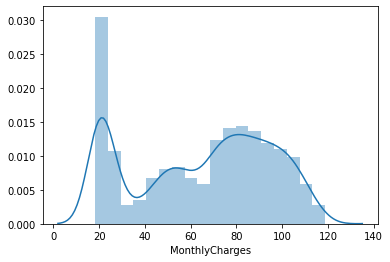

In [ ]:
sns.distplot(df['MonthlyCharges'],kde=True)

#Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#Decision Trees
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth=6)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
#print(len(y_test), len(y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7940360610263523
[[961  89]
 [208 184]]


In [ ]:
#Random Forest
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)
rf_predict = clf.predict(X_test)
print(accuracy_score(y_test, rf_predict))
print(confusion_matrix(y_test, y_pred))

0.7947295423023578
[[961  89]
 [208 184]]


In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print(accuracy_score(y_test, svc_predict))
print(confusion_matrix(y_test, svc_predict))

0.7871012482662968
[[945 105]
 [202 190]]


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'newton-cg', class_weight={True : 0.72, False : 0.28})
logmodel.fit(X_train , y_train)
LR_predictions = logmodel.predict(X_test)
print(type(LR_predictions))
print(accuracy_score(y_test, LR_predictions))
print(confusion_matrix(y_test, LR_predictions))

<class 'numpy.ndarray'>
0.753120665742025
[[794 256]
 [100 292]]


In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores.nlargest(10, 'Score')

               Specs         Score
4             tenure  13119.661984
17    MonthlyCharges   2812.089803
14          Contract    884.710159
8     OnlineSecurity    560.622929
11       TechSupport    556.486645
16     PaymentMethod    413.571311
10  DeviceProtection    353.100013
13   StreamingMovies    175.075299
12       StreamingTV    169.721440
3         Dependents    104.877410


,Specs,Score
4,tenure,13119.661984
17,MonthlyCharges,2812.089803
14,Contract,884.710159
8,OnlineSecurity,560.622929
11,TechSupport,556.486645
16,PaymentMethod,413.571311
10,DeviceProtection,353.100013
13,StreamingMovies,175.075299
12,StreamingTV,169.721440
3,Dependents,104.877410


0.7947295423023578
[[965  85]
 [211 181]]


In [ ]:
#Pred Comparison
df_with_pred = pd.DataFrame (LR_predictions)
df_with_pred.columns = ['LR_Pred_Churn']
df_with_pred['SVM_Pred_churn'] = pd.DataFrame (svc_predict)
df_with_pred['RF_Pred_churn'] = pd.DataFrame (rf_predict)
print(df_with_pred)

      LR_Pred_Churn  SVM_Pred_churn  RF_Pred_churn
0              True           False           True
1             False           False          False
2             False           False          False
3             False           False          False
4              True           False           True
...             ...             ...            ...
1437          False           False          False
1438          False           False          False
1439          False           False          False
1440          False           False          False
1441           True            True           True

[1442 rows x 3 columns]


TypeError: ignored

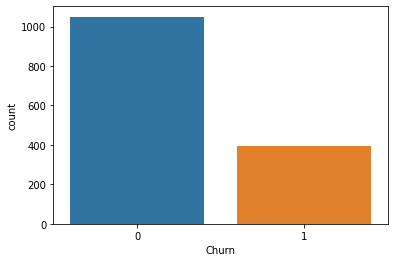

In [ ]:
sns.countplot(y_test)

In [1]:
rfe = RFE(estimator=tree, n_features_to_select=7, step=20)
train = rfe.fit(X_train, y_train)
prediction = train.predict(X_test)
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

NameError: ignored